# Polfilter

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Dunkelrauschen:

In [44]:
ch1 = np.loadtxt('data/dunkelrauschen/ch1.txt',skiprows=1).T
ch2 = np.loadtxt('data/dunkelrauschen/ch2.txt',skiprows=1).T
diff = np.loadtxt('data/dunkelrauschen/diff.txt',skiprows=1).T
quotient = np.loadtxt('data/dunkelrauschen/quotient.txt',skiprows=1).T

0.005473594227712137
0.0050491682089552235
-0.02198584762996865
-0.04011984630484989


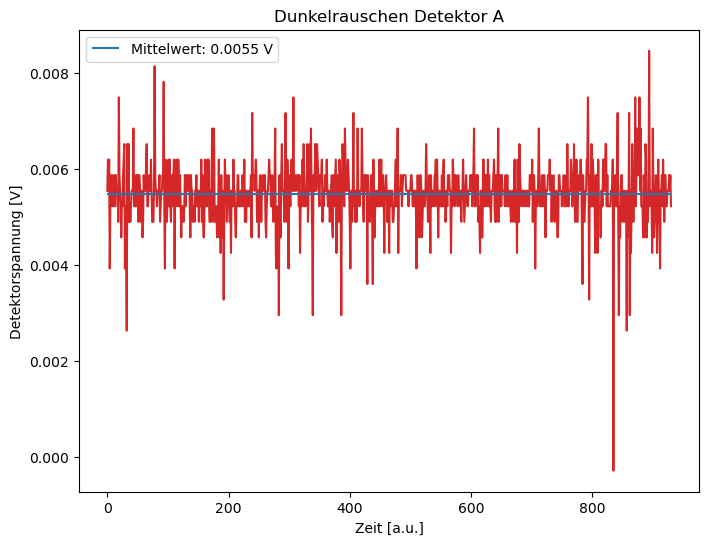

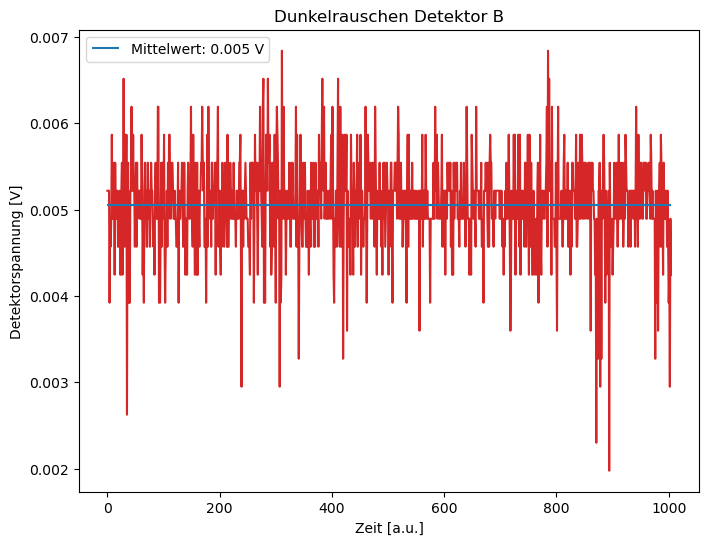

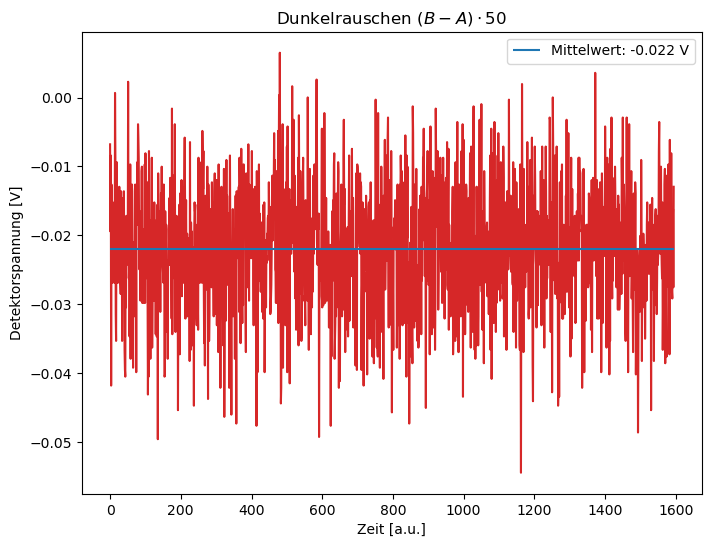

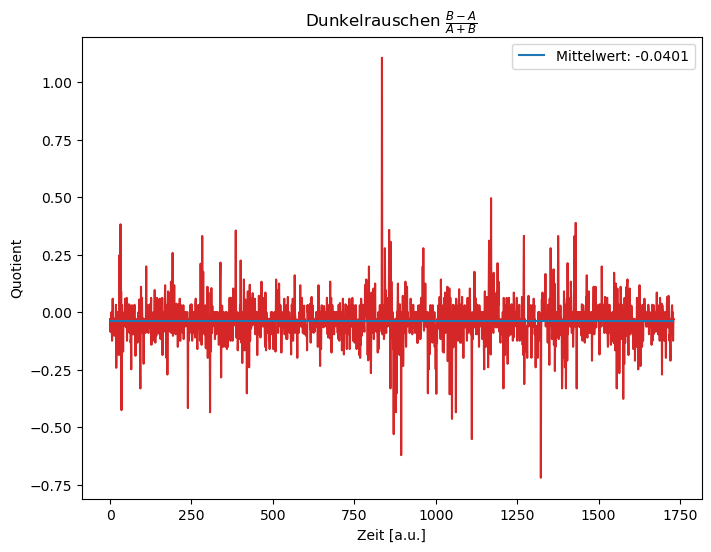

In [45]:
def dunkelrauschen(data,title,quotient=False):    
    plt.figure(figsize=(8,6))
    plt.plot(data[0],data[1],color='tab:red')
    mean = np.mean(data[1])
    print(mean)
    plt.title(title)
    plt.xlabel('Zeit [a.u.]')
    if quotient:
        plt.ylabel('Quotient')
        plt.hlines(mean,xmin=data[0][0],xmax=data[0][-1],color='tab:blue',label=f'Mittelwert: {round(mean,4)}')
    else:
        plt.ylabel('Detektorspannung [V]')
        plt.hlines(mean,xmin=data[0][0],xmax=data[0][-1],color='tab:blue',label=f'Mittelwert: {round(mean,4)} V')
    plt.legend()

dunkelrauschen(ch1,'Dunkelrauschen Detektor A')
dunkelrauschen(ch2,'Dunkelrauschen Detektor B')
dunkelrauschen(diff,'Dunkelrauschen $(B-A)\cdot 50$')
dunkelrauschen(quotient,r'Dunkelrauschen $\frac{B-A}{A+B}$',quotient=True)

Polarisatoren:  
Rechnen alle Intensitäten als I_gemessen = I_echt * Transmission

In [46]:
def malus(alpha,I_0,A,B,C):
    alpha = np.radians(alpha)
    return I_0 * np.cos(A*alpha-B)*np.cos(A*alpha-B)+C

def measured_to_real(data,nd):
    '''Rechnet über ND-Wert das echte Signal aus dem gemessenen aus.'''
    transmission = 10**(-nd)
    return data/transmission

[-3.77750859e+03  1.00739791e+00  6.23122544e-01  3.78495233e+03]


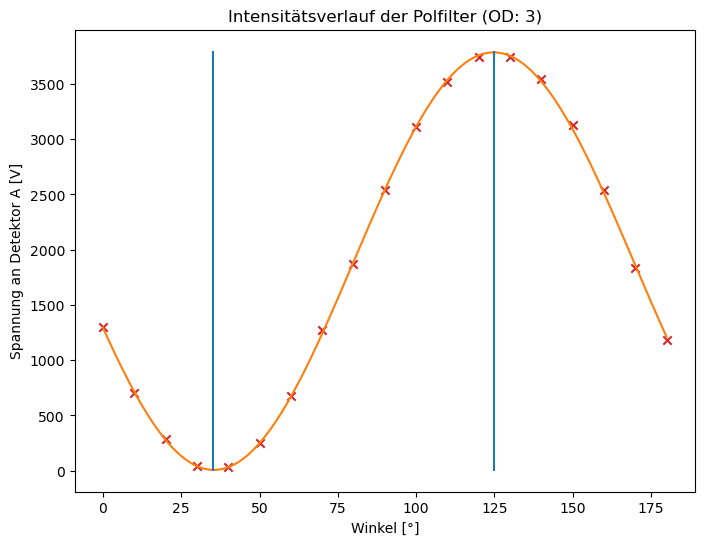

In [53]:
pol2 = np.arange(0,181,10)
pol2_intensity = np.array([1.30,0.70,0.29,0.04,0.03,0.25,0.68,1.27,1.87,2.54,3.11,3.52,3.74,3.74,3.54,3.13,2.54,1.83,1.18])
pol2_intensity = measured_to_real(pol2_intensity,3)

popt, pcov = curve_fit(malus,pol2,pol2_intensity,p0=[3500,1,1,1])
I_0, A, B, C = popt
print(popt)

# Scatter-Plot Daten
plt.figure(figsize=(8,6))
plt.xlabel('Winkel [°]')
plt.ylabel('Spannung an Detektor A [V]')
plt.title('Intensitätsverlauf der Polfilter (OD: 3)')
plt.scatter(pol2,pol2_intensity,marker='x',color='tab:red')

# Fit Malus-Gesetz
xfit = np.arange(0,181,1)
yfit = malus(xfit,I_0,A,B,C)
plt.plot(xfit,yfit,color='tab:orange')

# Bestimmung Minimum/Maximum
# minimum = min(yfit)
# min_index = yfit.index(minimum)
# maximum = max(yfit)
# max_index = yfit.index(maximum)
minimum = xfit[np.argmin(yfit)]
maximum = xfit[np.argmax(yfit)]
plt.vlines([minimum,maximum],ymin=0,ymax=3800,colors='tab:blue')


plt.savefig('figures/optiken/polfilter.pdf')